In [54]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [55]:
data = pd.read_csv("datasetFinal.csv")
data.drop_duplicates()
print(data.head())

       Artist Name                       Track Name  Popularity  danceability  \
0    Shubha Mudgal              Awakning Main Sutti           1         0.276   
1      Pretty Sick                     Bet My Blood           1         0.423   
2    C. Ramchandra  Subhaschandra Ke Naam Se, Pt. 1           1         0.611   
3       Rhys Lewis             No Right To Love You           1         0.531   
4  Mahendra Kapoor        Jai Janani Jai Bharat Maa           1         0.571   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.659    6    -6.642     0       0.0352      0.002190          0.000044   
1   0.984    9    -4.261     0       0.1000      0.000023          0.006760   
2   0.402    4   -11.807     1       0.3280      0.936000          0.000000   
3   0.269    1   -10.600     1       0.0406      0.866000          0.000000   
4   0.585    1    -8.611     1       0.1230      0.974000          0.000016   

   liveness  valence    tempo  duratio

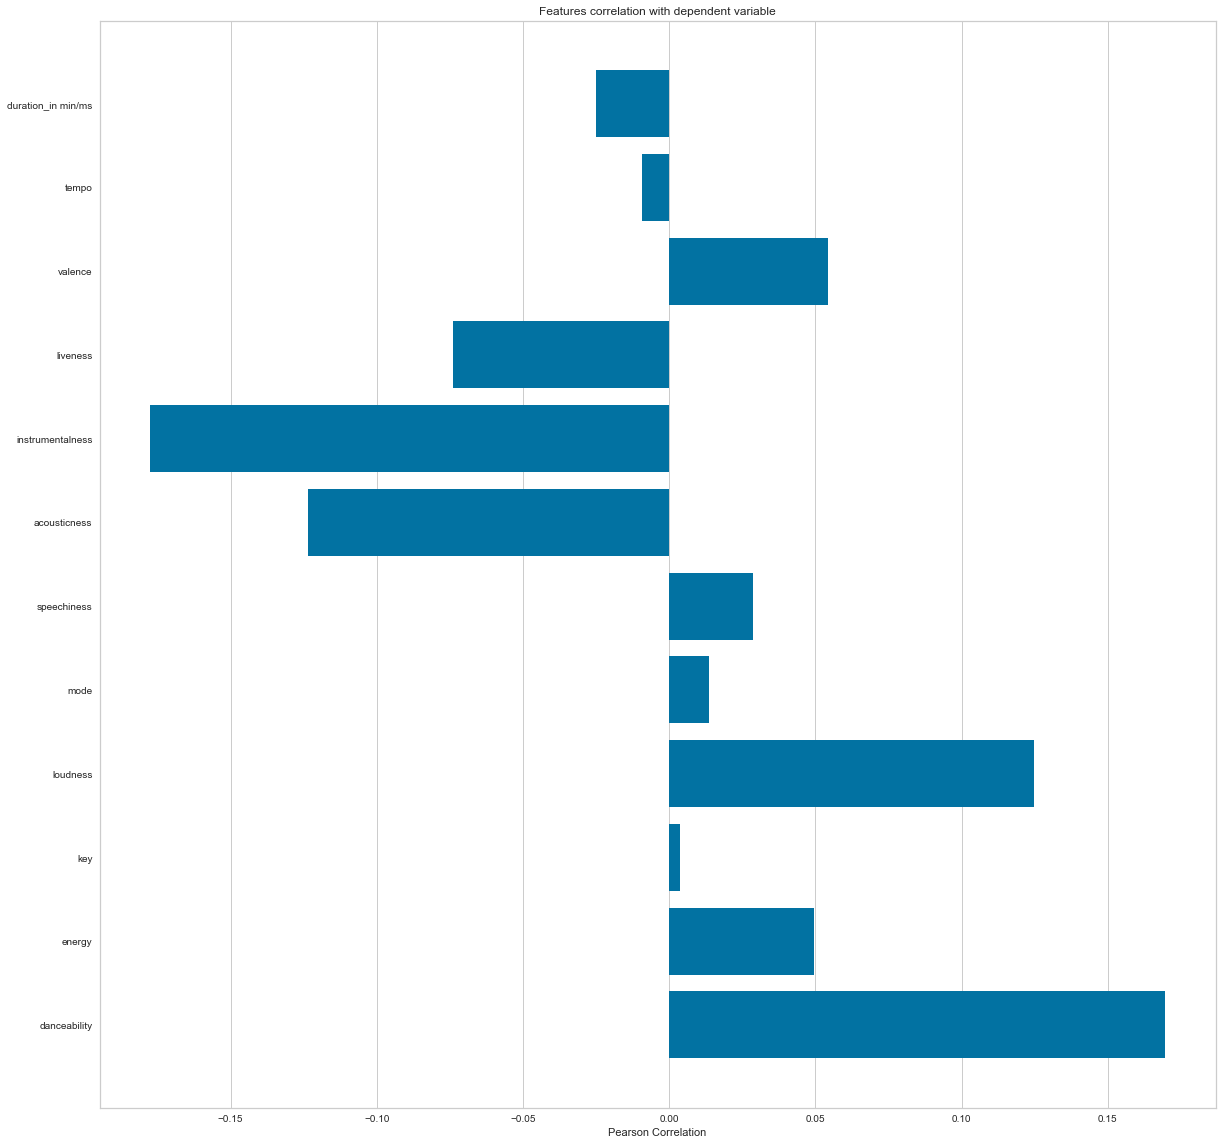

In [51]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['danceability', 'energy', 'key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms']

#We excluded the class (genre) and time signature from this feature graph because they are categorical data variables
#This mean we cannot compare them on a numerical scale with the other variables.

X, y = data[feature_names], data['Popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [38]:
fig = px.bar(data, x='Class', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.update_layout({
    "plot_bgcolor": "rgb(255,255,255)",
})
fig.show()

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=11, n_jobs=-1))])
X = data.select_dtypes(np.number)
cluster_pipeline.fit(X)
data['cluster'] = cluster_pipeline.predict(X)

In [28]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['Class'] = data['Class']
projection['cluster'] = data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'Class'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17568 samples in 0.063s...
[t-SNE] Computed neighbors for 17568 samples in 7.803s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17568
[t-SNE] Computed conditional probabilities for sample 2000 / 17568
[t-SNE] Computed conditional probabilities for sample 3000 / 17568
[t-SNE] Computed conditional probabilities for sample 4000 / 17568
[t-SNE] Computed conditional probabilities for sample 5000 / 17568
[t-SNE] Computed conditional probabilities for sample 6000 / 17568
[t-SNE] Computed conditional probabilities for sample 7000 / 17568
[t-SNE] Computed conditional probabilities for sample 8000 / 17568
[t-SNE] Computed conditional probabilities for sample 9000 / 17568
[t-SNE] Computed conditional probabilities for sample 10000 / 17568
[t-SNE] Computed conditional probabilities for sample 11000 / 17568
[t-SNE] Computed conditional probabilities for sample 12000 / 17568
[t-SNE] Computed conditional probabilities for sam

In [56]:
def find_song(name):
    return data.loc[data['Track Name'] == name]
find_song("Leave The Door Open")

Artist Name           Track Name  \
14024  Bruno Mars, Anderson .Paak, Silk Sonic  Leave The Door Open   

       Popularity  danceability  energy  key  loudness  mode  speechiness  \
14024          92         0.586   0.616    5    -7.964     1       0.0324   

       acousticness  instrumentalness  liveness  valence    tempo  \
14024         0.182               0.0    0.0927    0.719  148.088   

       duration_in min/ms  time_signature Class  
14024            4.034933               4   Pop